Analisys of 2015 survey of Mobility in Bogota
=============================================

---

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

#### Testing section

#### About the Dataset 

---
This dataset contains information about the origin and destination of people around Bogota, and some places at the outskirts of the city. Like Chia, Soacha, Funza, etc. It includes info about which means of transport were used, duration, and reason to mobilize. 

We are going to start looking to the general image, just having in count the town/city of origin and destination. In this graph the nodes are cities and the edges have a weight based on how many people move from place to place. Also, because the dataset provides the information a directed graph is going to be created.

You can check more details about this dataset [Here](https://www.datos.gov.co/Transporte/Encuesta-de-movilidad-de-Bogot-2015-Caracterizaci-/mvbb-bn7j).


#### Creation of graph and import of data

---
Here, we create the directed graph, import the info from the csv file and make some validations to avoid noisy information due to problems in formatting:

In [5]:
G = nx.DiGraph()
file = open('encuesta.csv')
i=0
for l in file:
    ##To skip the header
    if i==0:
        i+=1
        continue
    #print(i, end=" ")
    ### To visualize the import
    #if i>=100:
        #break
    i+=1  
    linea= l.strip().split(',')
    #print(linea[12], end=" ")##origin
    #print(linea[4])
    origen=""
    #print(linea[10].strip(), end=" ")
    if linea[10].strip().startswith("BICICLETA CON MOTOR"):
        origen=linea[13]
    else:
        origen= linea[12]
    #print(origen, end=" ")   
    #print(linea[4])
    #if  origen.startswith('SOACHA') and origen==linea[4] :
        #print(i)
    if (origen, linea[4]) in G.edges():
        G[origen][linea[4]]['weight']+=1
    else:
        G.add_edge(origen, linea[4], weight=1 )
    

##### Checking basic info
Having the directed graph created we can check that there are 19 cities corresponding to the nodes. The 335 edges represent the different choices that people answer of their movement from city to city. You should notice that movement in the same city is possible and it is represented with self loops.

In [12]:
print("Edges:", end=" ")
print(len(G.edges()))
print("Nodes:", end=" ")
print(len(G.nodes()))

Edges: 335
Nodes: 19


#### Centrality
##### Out degree centrality

In [30]:
nodes_c = nx.out_degree_centrality(G)
#for e in nodes_c:
    #print((e, nodes_c[e]))     

<BarContainer object of 19 artists>

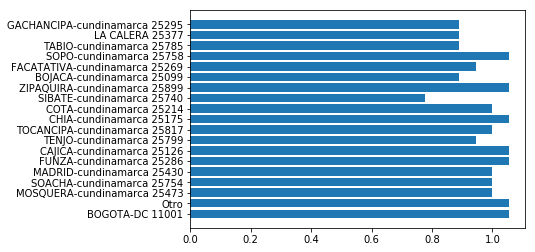

In [31]:
#nx.average_clustering(G)
group_data = list(nodes_c.values())
group_names = list(nodes_c.keys())
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

Using the density measure for the graph get in Gephi thas was 0.98 it can ben seen that is easy to find someone that needs or want to go to the other cities around Bogota. 
But looking to the outdegree measurement by city. It can be seen the minimum value in Sibate, which can be due to how far it is from Bogota and that is main connection is with Soacha and Bogota.

#### In degree centrality

In [35]:
nodes_c_i = nx.in_degree_centrality(G)
#for e in nodes_c_i:
    #print((e, nodes_c_i[e]))     

<BarContainer object of 19 artists>

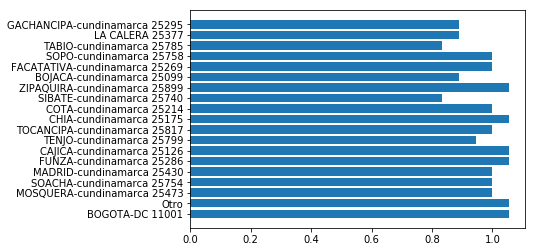

In [36]:
group_data = list(nodes_c_i.values())
group_names = list(nodes_c_i.keys())
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

Once again Sibate is at the bottom of the list with Tabio, this can be interpreted as the least wanted or needed place to go. In those two cases it can be due to the fact, that people could just going there to come back from work or study. Also economic conditions and not being as relevant as a turistic region could contribute to this result.

#### Exporting graph to gephi(Visualization)

---

It can be seen in figure 1, the resulting graph, showing the nodes with more weight bigger. also you can see the self loop at each city representing usually a more weighted edge than other circunstances.

In [8]:
nx.write_gexf(G, "survey_mobility_cities.gexf")


![Image](survey_weight_city.png)

<small>Figure 1. Graph weighted and directed showing the choices of mobility in Bogota and surroundings. </small>


![Image](communities_cities.png)

<small>Figure 2. Graph resulting from applying modularity class, the result are three regions in total. </small>


![Image](mapa_community1.png)

<small>
Figure 3. Map showing physical location of community in green. Including Funza, Madring and Mosquera at left side of the picture.
</small>


![Image](mapa_community2.png)

<small>
Figure 4. Map showing physical location of community in yellow. Including Tocancipa, Gachancipa and Sopo at the top of the picture.
</small>

### Analisys of the results

* Due to population size, unversities and the amount of jobs,  the node for Bogota is expected to be bigger than the others. 
For the same reason, the heaviest edge is the self loop in Bogota.

* With the clustering coefficient gotten from Gephi of 0.938 and taking a look to Figure 1 and 2, it can be seen how the graph is almost fully connected, so it is easy to find people that needs to go usually most of the rest of the nodes. 

* The default communities detected are not as accurate as the actual regions or communities that are seeing or expected in the physical location of cities. But there are just 19 nodes and the fact pointed in the last paragraph could contribute to this result.

* In figure 3, we can see that Madrid, Mosquera and Funza are close physically, and in Figure 2 is shown that they belong to the same community. So, this could mean how Mosquera is not just a passing point to reach Bogota, but they have to be related somehow to buy products, workplace or schools.

* There is another community conformed by Tocancipa, Gachancipa and Sopo which can be seen in figure 2. Something interesting about this one, is that there is not a central point to reach Bogota, as was the case in the previous analysis. So once again they have to be connected by daily basic works, which creates the need to move between them.